GAN、WGAN、WGAN-GP

In [26]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import random
import os

In [29]:
if not os.path.exists('./result/gan'):
    

1


In [2]:
m = loadmat("./points1.mat")

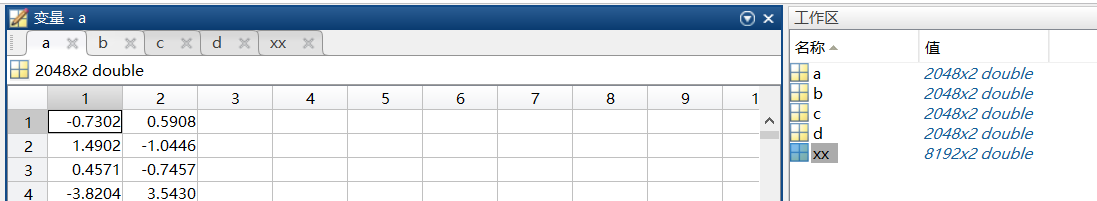

In [3]:
data_a = m['a']
data_b = m['b']
data_c = m['c']
data_d = m['d']
data_xx = m['xx']

In [4]:
print(data_a.shape)
print(data_b.shape)
print(data_c.shape)
print(data_d.shape)
print(data_xx.shape)

(2048, 2)
(2048, 2)
(2048, 2)
(2048, 2)
(8192, 2)


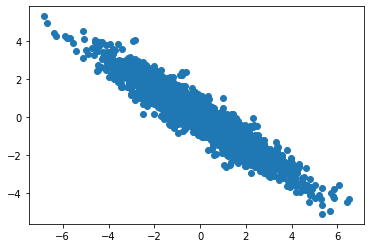

In [5]:
# data_a散点图
plt.scatter(data_a[:,0],data_a[:,1])

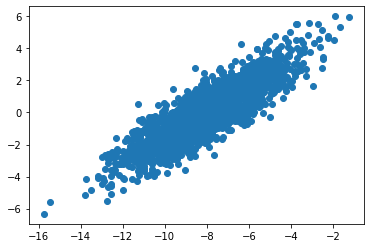

In [6]:
# data_b散点图
plt.scatter(data_b[:,0],data_b[:,1])

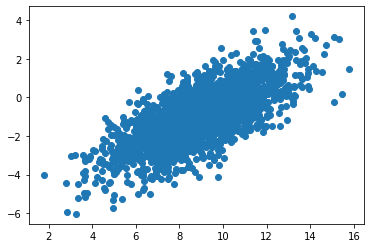

In [7]:
# data_c散点图
plt.scatter(data_c[:,0],data_c[:,1])

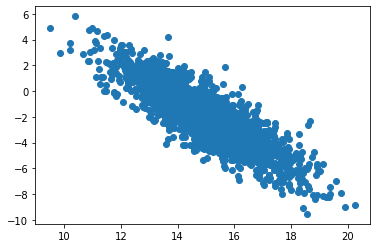

In [8]:
# data_d散点图
plt.scatter(data_d[:,0],data_d[:,1])

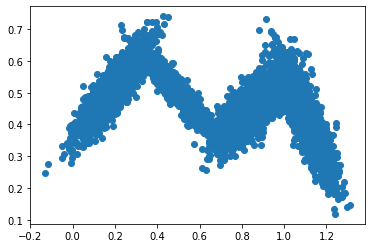

In [9]:
# data_xx散点图
plt.scatter(data_xx[:,0],data_xx[:,1])

In [10]:
np.random.shuffle(data_xx)

In [11]:
train_set_rate = 0.8 # 设置训练集占训练集和验证集的比例
size = int(train_set_rate * len(data_xx))
train_set = data_xx[:size]
valid_set = data_xx[size:]

In [12]:
print('训练集大小：',len(train_set))
print('验证集大小：',len(valid_set))

训练集大小： 6553
验证集大小： 1639


---
--------------------------------------GAN--------------------------------------
---
---

In [13]:
# 生成器
class generator(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.generator_model = nn.Sequential(
            nn.Linear(INPUT_SIZE, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
            # nn.Tanh()  # 加上该层会导致分布被截断
        )
 
    def forward(self, x):
        x = self.generator_model(x)
        return x

In [14]:
# 判别器
class discriminator(nn.Module):
    def __init__(self):
        super(discriminator, self).__init__()
        # 两层线性全连接
        self.discriminator_model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid() 
        )
 
    def forward(self, x):
        x = self.discriminator_model(x)
        return x

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
INPUT_SIZE = 10 # 生成器输入的噪声维度
LR = 0.0001
D = discriminator().to(device)
G = generator().to(device)

In [16]:
# Binary cross entropy loss and optimizer
d_optimizer = torch.optim.Adam(D.parameters(), lr=LR)
g_optimizer = torch.optim.Adam(G.parameters(), lr=LR)

In [17]:
D # 由两个输入(x,y)预测该点为T/F

discriminator(
  (discriminator_model): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [18]:
G # 由噪声输入预测样本(x，y) 

generator(
  (generator_model): Sequential(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2, bias=True)
  )
)

-----
模型训练
--
---

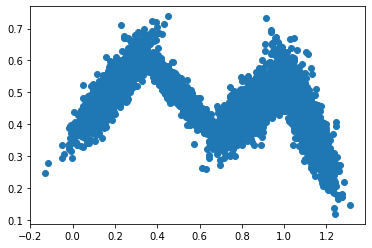

In [19]:
# train_set散点图
plt.scatter(train_set[:,0],train_set[:,1])

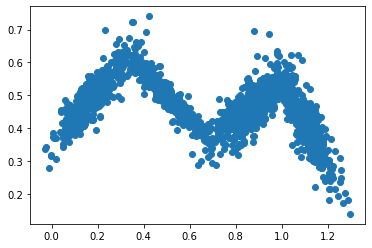

In [20]:
# valid_set散点图
plt.scatter(valid_set[:,0],valid_set[:,1])

In [21]:
def draw_scatter(data, color, x_min, x_max, y_min, y_max):
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title('Scatter Plot')
    plt.xlabel("X", fontsize=14)
    plt.ylabel("Y", fontsize=14)
    plt.scatter(data[:, 0], data[:, 1], c=color, s=10)
    
def draw_background(D, x_min, x_max, y_min, y_max):
    i = x_min
    bg = []
    while i <= x_max - 0.01:
        j = y_min
        while j <= y_max - 0.01:
            bg.append([i, j])    
            j += 0.01
        bg.append([i, y_max])
        i += 0.01
    j = y_min
    while j <= y_max - 0.01:
        bg.append([i, j])    
        j += 0.01
        bg.append([i, y_max])
    bg.append([x_max, y_max])
    color = D(torch.Tensor(bg).to(device))
    bg = np.array(bg)
    cm = plt.cm.get_cmap('gray')
    sc = plt.scatter(bg[:, 0], bg[:, 1], c= np.squeeze(color.cpu().data), cmap=cm)
    # 显示颜色等级
    cb = plt.colorbar(sc)
    return cb

In [22]:
def test_G():
    G_input = torch.randn(2000, INPUT_SIZE).to(device)
    G_out = G(G_input)
    G_data = np.array(G_out.cpu().data)

    x_min = -1
    x_max = 2
    y_min = 0
    y_max = 1
    # 画背景
    cb = draw_background(D, x_min, x_max, y_min, y_max)
    # 画出测试集的点分布和生成器输出的点分布
    draw_scatter(valid_set, 'b', x_min, x_max, y_min, y_max)
    draw_scatter(G_data, 'r', x_min, x_max, y_min, y_max)
    return cb

In [23]:
epoch_num = 1000
batch_size = 32

epoch: 1 	 batch: 1 		 d_loss: 1.35115921 	 g_loss: -0.67240483 
epoch: 1 	 batch: 2 		 d_loss: 1.34886909 	 g_loss: -0.68156546 
epoch: 1 	 batch: 3 		 d_loss: 1.34865916 	 g_loss: -0.68077016 
epoch: 1 	 batch: 4 		 d_loss: 1.32672167 	 g_loss: -0.68124807 
epoch: 1 	 batch: 5 		 d_loss: 1.33870840 	 g_loss: -0.68409669 
epoch: 1 	 batch: 6 		 d_loss: 1.34386170 	 g_loss: -0.68659055 
epoch: 1 	 batch: 7 		 d_loss: 1.32200813 	 g_loss: -0.69159806 
epoch: 1 	 batch: 8 		 d_loss: 1.32872021 	 g_loss: -0.69518876 
epoch: 1 	 batch: 9 		 d_loss: 1.33593893 	 g_loss: -0.69830042 
epoch: 1 	 batch: 10 		 d_loss: 1.31960332 	 g_loss: -0.69941801 
epoch: 1 	 batch: 11 		 d_loss: 1.32485008 	 g_loss: -0.70377696 
epoch: 1 	 batch: 12 		 d_loss: 1.34065354 	 g_loss: -0.70825660 
epoch: 1 	 batch: 13 		 d_loss: 1.32103038 	 g_loss: -0.71714997 
epoch: 1 	 batch: 14 		 d_loss: 1.32306588 	 g_loss: -0.71898401 
epoch: 1 	 batch: 15 		 d_loss: 1.33989573 	 g_loss: -0.72483146 
epoch: 1 	 batch: 1

epoch: 1 	 batch: 132 		 d_loss: 1.47672164 	 g_loss: -0.83130425 
epoch: 1 	 batch: 133 		 d_loss: 1.47657371 	 g_loss: -0.84365416 
epoch: 1 	 batch: 134 		 d_loss: 1.48162031 	 g_loss: -0.85172480 
epoch: 1 	 batch: 135 		 d_loss: 1.51843226 	 g_loss: -0.84649026 
epoch: 1 	 batch: 136 		 d_loss: 1.49820971 	 g_loss: -0.85509384 
epoch: 1 	 batch: 137 		 d_loss: 1.50735092 	 g_loss: -0.85005319 
epoch: 1 	 batch: 138 		 d_loss: 1.49200380 	 g_loss: -0.85894006 
epoch: 1 	 batch: 139 		 d_loss: 1.49278772 	 g_loss: -0.84984624 
epoch: 1 	 batch: 140 		 d_loss: 1.49338663 	 g_loss: -0.84730673 
epoch: 1 	 batch: 141 		 d_loss: 1.47507131 	 g_loss: -0.84947401 
epoch: 1 	 batch: 142 		 d_loss: 1.47804368 	 g_loss: -0.84766436 
epoch: 1 	 batch: 143 		 d_loss: 1.47306097 	 g_loss: -0.84077793 
epoch: 1 	 batch: 144 		 d_loss: 1.44409108 	 g_loss: -0.83246380 
epoch: 1 	 batch: 145 		 d_loss: 1.45441794 	 g_loss: -0.82595026 
epoch: 1 	 batch: 146 		 d_loss: 1.44968534 	 g_loss: -0.81948

FileNotFoundError: [Errno 2] No such file or directory: './result/gan/epoch1.png'

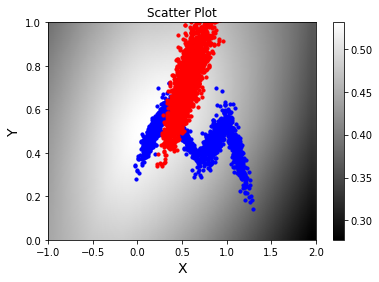

In [24]:
for epoch in range(epoch_num):
    for i in range(int(size / batch_size)):
        label = torch.from_numpy(train_set[i*batch_size: (i+1)*batch_size]).float().to(device) # 把这个batch的训练集扔进gpu
        G_input = torch.randn(batch_size, INPUT_SIZE).to(device) # 噪音扔进GPU
        G_out = G(G_input) # 噪音预测的样本
        # 计算判别器判别的概率
        prob_gen = D(G_out) # 使用判别器判别噪声生成的样本数据   
       
       
        G_loss = torch.mean(torch.log(1. - prob_gen)).to(device)
        g_optimizer.zero_grad()
        G_loss.backward()
        g_optimizer.step()
        
        prob_label = D(label) # 使用判别器判别真实数据的真假  
        prob_gen = D(G_out.detach()) # 使用判别器判别噪声生成的样本数据  

        D_loss = - torch.mean(torch.log(prob_label) + torch.log(1. - prob_gen)).to(device)
        
        d_optimizer.zero_grad()
        D_loss.backward(retain_graph=True)
        d_optimizer.step()


        print("epoch: %d \t batch: %d \t\t d_loss: %.8f \t g_loss: %.8f "%(epoch+1, i+1, D_loss, G_loss))

    if (epoch) % 5 == 0 :
        cb = test_G()
        plt.savefig('./result/gan/epoch'+ str(epoch+1))
        cb.remove()
        plt.cla()